# Aadhar Enrolment Data EDA

This notebook performs Exploratory Data Analysis on the Aadhar Enrolment dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

plt.style.use('ggplot')
sns.set_palette("magma")

In [2]:
# Load Data
folder_path = '../api_data_aadhar_enrolment/api_data_aadhar_enrolment/'
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

df_list = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df_list.append(df)

if df_list:
    df_enrol = pd.concat(df_list, axis=0, ignore_index=True)
    print(f"Loaded {len(df_list)} files. Total rows: {len(df_enrol)}")
else:
    print("No files found!")

Loaded 3 files. Total rows: 1006029


In [3]:
df_enrol.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [4]:
df_enrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


## Data Cleaning and Preprocessing

In [5]:
# Convert date to datetime
df_enrol['date'] = pd.to_datetime(df_enrol['date'], format='%d-%m-%Y', errors='coerce')

# Check for nulls
print(df_enrol.isnull().sum())

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64


## Exploratory Analysis

In [6]:
# Descriptive Statistics
df_enrol.describe()

,date,pincode,age_0_5,age_5_17,age_18_greater
count,1006029,1.006029e+06,1.006029e+06,1.006029e+06,1.006029e+06
mean,2025-10-23 18:26:44.387150336,5.186415e+05,3.525709e+00,1.710074e+00,1.673441e-01
min,2025-03-02 00:00:00,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,2025-09-19 00:00:00,3.636410e+05,1.000000e+00,0.000000e+00,0.000000e+00
50%,2025-10-27 00:00:00,5.174170e+05,2.000000e+00,0.000000e+00,0.000000e+00
75%,2025-11-15 00:00:00,7.001040e+05,3.000000e+00,1.000000e+00,0.000000e+00
max,2025-12-31 00:00:00,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02
std,NaN,2.056360e+05,1.753851e+01,1.436963e+01,3.220525e+00


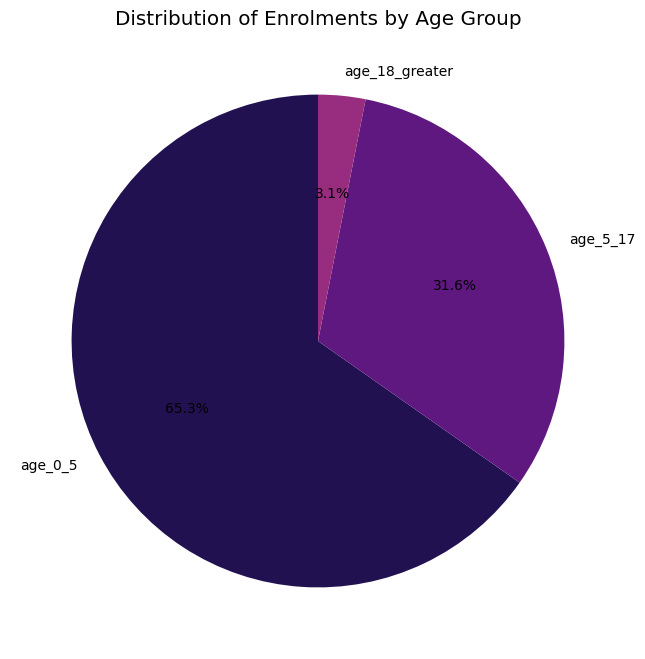

In [7]:
# Enrolment by Age Group
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']
total_enrolment = df_enrol[age_cols].sum()

plt.figure(figsize=(8, 8))
total_enrolment.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Enrolments by Age Group')
plt.ylabel('')
plt.show()

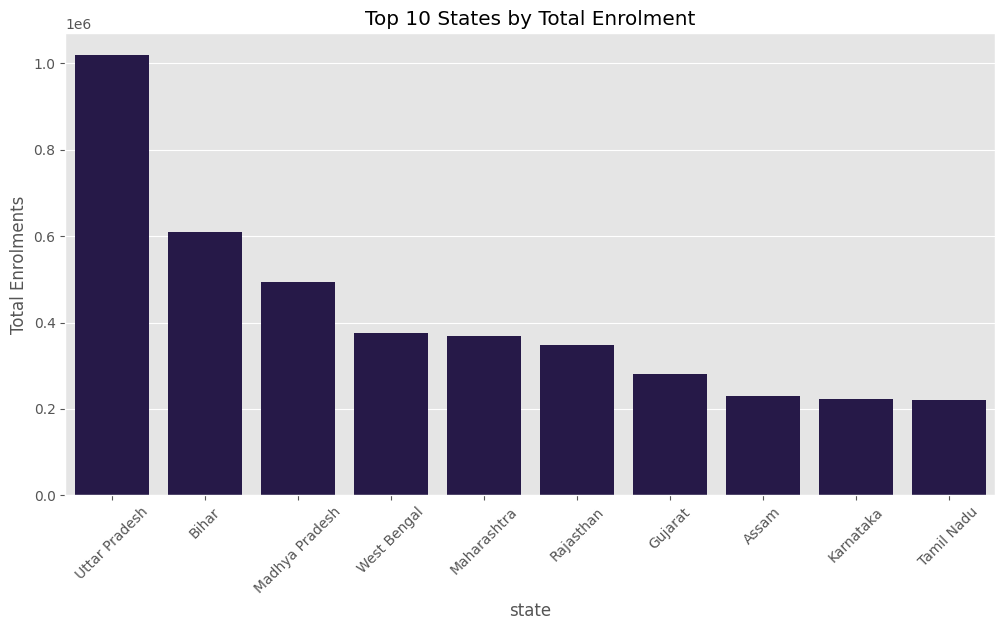

In [8]:
# State-wise Enrolments (Total)
df_enrol['total_enrolment'] = df_enrol[age_cols].sum(axis=1)
state_counts = df_enrol.groupby('state')['total_enrolment'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Top 10 States by Total Enrolment')
plt.xticks(rotation=45)
plt.ylabel('Total Enrolments')
plt.show()

In [ ]:
# Time Series Analysis
daily_trend = df_enrol.groupby('date')[age_cols].sum()
daily_trend.plot(figsize=(14, 6))
plt.title('Daily Enrolment Trend by Age Group')
plt.ylabel('Count')
plt.show()